# Spam Comment Classification

### Variables:
- df: Dataframe from "Comment Spam.xls"
- X: "Comment" feature from Dataframe
- y: "Class" feature from Dataframe
    - Class 1: Means <b>Spam*</b>
    - Class 0: Means <b>Not Spam*</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
df = pd.read_excel('Comment Spam.xls')
df.head()

,No,Comment,Class
0,1,this song is racist,0
1,2,and how many subscribers compared to her over ...,1
2,3,HI! CHECK OUT OUR AWESOME COVERS! AND SAY WHAT...,1
3,4,well done shakira,0
4,5,:D subscribe to me for daily vines,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   No       1300 non-null   int64 
 1   Comment  1300 non-null   object
 2   Class    1300 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 30.6+ KB


# Exploratory Data Analysis (EDA)

In [4]:
# total count for each classes
df['Class'].value_counts()

1    669
0    631
Name: Class, dtype: int64

In [5]:
# mode for comment
df['Comment'].mode()

0    Check out this video on YouTube:﻿
dtype: object

In [6]:
# total count for each comments
df['Comment'].value_counts().head()

Check out this video on YouTube:﻿                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             74
Check out this playlist on YouTube:﻿                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [7]:
# which class for comment mode?
df[df['Comment'] == 'Check out this video on YouTube:﻿']

,No,Comment,Class
341,342,Check out this video on YouTube:﻿,1
344,345,Check out this video on YouTube:﻿,1
386,387,Check out this video on YouTube:﻿,1
391,392,Check out this video on YouTube:﻿,1
393,394,Check out this video on YouTube:﻿,1
...,...,...,...
1240,1241,Check out this video on YouTube:﻿,1
1262,1263,Check out this video on YouTube:﻿,1
1277,1278,Check out this video on YouTube:﻿,1
1283,1284,Check out this video on YouTube:﻿,1


# Feature Engineering

In [8]:
# add feature for length for each comments
df['comment_len'] = df['Comment'].apply(len)
df.head()

,No,Comment,Class,comment_len
0,1,this song is racist,0,19
1,2,and how many subscribers compared to her over ...,1,55
2,3,HI! CHECK OUT OUR AWESOME COVERS! AND SAY WHAT...,1,57
3,4,well done shakira,0,17
4,5,:D subscribe to me for daily vines,1,34


Text(0.5,0,'Comment Length')

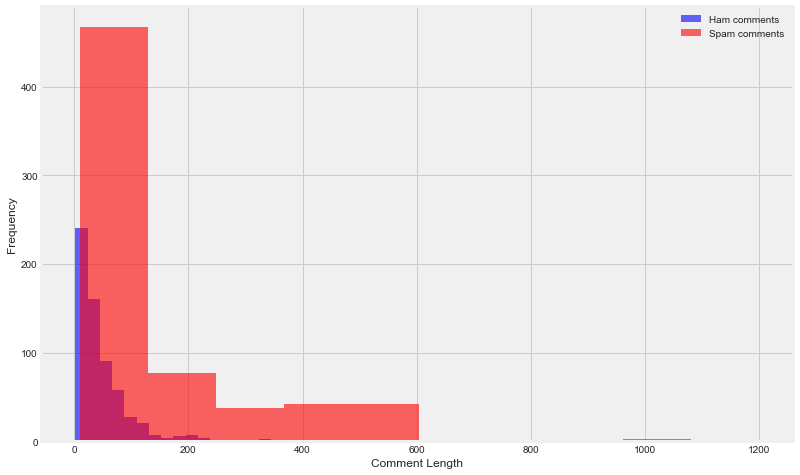

In [9]:
# histogram for comment_len
plt.figure(figsize=(12, 8))

df[df['Class']==0]['comment_len'].plot(bins=35, kind='hist', color='blue', 
                                       label='Ham comments', alpha=0.6)
df[df['Class']==1]['comment_len'].plot(kind='hist', color='red', 
                                       label='Spam comments', alpha=0.6)
plt.legend()
plt.xlabel("Comment Length")

In [10]:
df[df['Class']==0]['comment_len'].describe()

count    631.000000
mean      48.827258
std       57.834605
min        2.000000
25%       17.000000
50%       33.000000
75%       62.000000
max      753.000000
Name: comment_len, dtype: float64

In [11]:
df[df['Class']==1]['comment_len'].describe()

count     669.000000
mean      139.687593
std       164.537283
min        10.000000
25%        34.000000
50%        62.000000
75%       171.000000
max      1200.000000
Name: comment_len, dtype: float64

In [12]:
# find comment which have 1200 characters
df[df['comment_len']==1200]['Comment'].iloc[0]

'&lt;script&gt;document.write(\'&lt;a target="_self" href=" http://rover.ebay.com/rover/1/710-53481-19255-0/1?icep_ff3=1&amp;pub=5575096797&amp;toolid=10001&amp;campid=5337555197&amp;customid=bogdan+grigore&amp;ipn=psmain&amp;icep_vectorid=229508&amp;kwid=902099&amp;mtid=824&amp;kw=lg"&gt;check  this out new arive on ebay&lt;/a&gt;&lt;img  style="text-decoration:none;border:0;padding:0;margin:0;" src=" http://rover.ebay.com/roverimp/1/710-53481-19255-0/1?ff3=1&amp;pub=5575096797&amp;toolid=10001&amp;campid=5337555197&amp;customid=bogdan+grigore&amp;mpt=\'+Math.floor(Math.random()*999999999)+\'"&gt;\');&lt;/script&gt;&lt;noscript&gt;&lt;a  target="_self" href=" http://rover.ebay.com/rover/1/710-53481-19255-0/1?icep_ff3=1&amp;pub=5575096797&amp;toolid=10001&amp;campid=5337555197&amp;customid=bogdan+grigore&amp;ipn=psmain&amp;icep_vectorid=229508&amp;kwid=902099&amp;mtid=824&amp;kw=lg"&gt;check  this out new arive on ebay&lt;/a&gt;&lt;img  style="text-decoration:none;border:0;padding:0;ma

In [13]:
# find comment which have 753 characters
df[df['comment_len']==753]['Comment'].iloc[0]

"Hey I think I know what where dealing with here!!!! I have some theories of  how this could've gotten 2billion hits!! 1. This was mabey made in korea and its realy popular there so they were  stuck watching this over and over again. 2. Over 2billion people have access to the Internet, including youtube, and  the numbers are rising, by 2017 half of the populatoin will be connected. 3. Hackers In Korea may have loved it so much they rised it to 2billion  hits to make it more popular.  4. The song was featured in a just dance game, on multiple mp3s, and been  seen on concerts and even on new years eve event in 2012, so just by seeing  those you mabey adding more hits to this video. 5. You are complaining to much on how the heck this has 2b hits.\ufeff"

# Split Data

In [14]:
X = df['Comment']
y = df['Class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
# total row x column for training and testing dataset
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(X_test.shape)

(1040,)
(1040,)
(260,)
(260,)


# Vectorization

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_dtm = v.fit_transform(X_train)
X_train_dtm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [17]:
X_test_dtm = v.transform(X_test)
X_test_dtm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Modelling with Naive Bayes

In [18]:
# import an instantiate a logistic regression model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [19]:
X_train_dtm.shape

(1040, 2811)

In [20]:
X_test_dtm.shape

(260, 2811)

In [21]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

In [22]:
# import confusion_matrix and classification_report
from sklearn.metrics import confusion_matrix, classification_report

In [23]:
# print the confusion matrix
print(confusion_matrix(y_test, y_pred_class))

[[112   9]
 [ 11 128]]


In [24]:
# print the classification report
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       121
           1       0.93      0.92      0.93       139

    accuracy                           0.92       260
   macro avg       0.92      0.92      0.92       260
weighted avg       0.92      0.92      0.92       260



# Modelling with Logistic Regression

In [25]:
# import an instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [26]:
logreg.fit(X_train_dtm, y_train)

LogisticRegression()

In [27]:
# make class predictions for X_test_dtm
y_pred_class = logreg.predict(X_test_dtm)

In [28]:
# print the confusion matrix
print(confusion_matrix(y_test, y_pred_class))

[[120   1]
 [ 15 124]]


In [29]:
# print the classification report
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       121
           1       0.99      0.89      0.94       139

    accuracy                           0.94       260
   macro avg       0.94      0.94      0.94       260
weighted avg       0.94      0.94      0.94       260



# Modelling with Support Vector Machine (SVM)

In [30]:
# import an instantiate an svm model
from sklearn.svm import SVC
svm = SVC()

In [31]:
svm.fit(X_train_dtm, y_train)

SVC()

In [32]:
# make class predictions for X_test_dtm
y_pred_class = svm.predict(X_test_dtm)

In [33]:
# print the confusion matrix
print(confusion_matrix(y_test, y_pred_class))

[[120   1]
 [ 13 126]]


In [34]:
# print the classification report
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       121
           1       0.99      0.91      0.95       139

    accuracy                           0.95       260
   macro avg       0.95      0.95      0.95       260
weighted avg       0.95      0.95      0.95       260



# Cross Validation

In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
# cross validation for Naive Bayes Model
nb_score = cross_val_score(nb, X_train_dtm, y_train, cv=5)
nb_score

array([0.91826923, 0.92307692, 0.90384615, 0.89423077, 0.90384615])

In [37]:
# cross validation for Logistic Regression Model
logreg_score = cross_val_score(logreg, X_train_dtm, y_train, cv=5)
logreg_score

array([0.94230769, 0.93269231, 0.96153846, 0.94711538, 0.94711538])

In [38]:
# cross validation for SVM Model
svm_score = cross_val_score(svm, X_train_dtm, y_train, cv=5)
svm_score

array([0.96153846, 0.91826923, 0.94230769, 0.90384615, 0.90865385])

In [39]:
print('Average Score for Naive Bayes:', np.average(nb_score))
print('Average Score for Logistic Regression:', np.average(logreg_score))
print('Average Score for SVM:', np.average(svm_score))

Average Score for Naive Bayes: 0.9086538461538461
Average Score for Logistic Regression: 0.9461538461538461
Average Score for SVM: 0.9269230769230768


Based on the results above, the model we will choose is the logistic regression model because it has the highest score.

# Prediction Example

In [40]:
comments = [
    'Lalisa Manoban just carry ang paving the way and brought many locals to kpop. Queen indeed',
    'Stay home and watch these video make me happy allday. Anyone agree with me ?'
]
comment_dtm= v.transform(comments)
logreg.predict(comment_dtm)

array([0, 1], dtype=int64)

'Lalisa Manoban just carry ang paving the way and brought many locals to kpop. Queen indeed' is not spam

'Stay home and watch these video make me happy allday. Anyone agree with me ?' is spam